In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
filePath = r'/content/drive/MyDrive/archive'
#filePath = r'C:\Users\swagg\OneDrive\Documents\Academic\ENPM808Y AI-ML\GroupProject\archive'

file1 = 'Train_Beneficiarydata-1542865627584.csv'
file2 = 'Train_Inpatientdata-1542865627584.csv'
file3 = 'Train_Outpatientdata-1542865627584.csv'
file4 = 'Train-1542865627584.csv'
beneficiaryData = pd.read_csv(os.path.join(filePath,file1))
inpatientData = pd.read_csv(os.path.join(filePath,file2))
outpatientData = pd.read_csv(os.path.join(filePath,file3))
fraudVals = pd.read_csv(os.path.join(filePath,file4))

In [22]:
beneficiaryData.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [23]:
beneficiaryData.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [24]:
beneficiaryData.Gender.value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [25]:
beneficiaryData.Race.value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

In [26]:
stateLabels = beneficiaryData['State'].unique()

In [27]:
len(beneficiaryData.State.unique())

52

Text(0.5, 1.0, 'County')

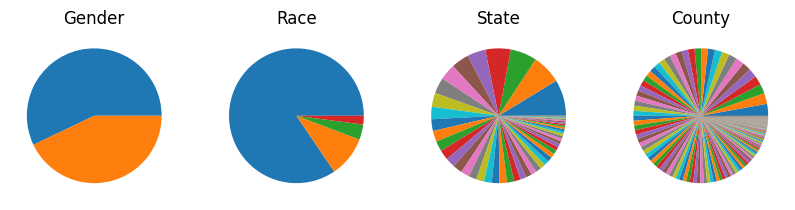

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,4,1)
plt.pie(beneficiaryData.Gender.value_counts())
plt.title('Gender')

plt.subplot(1,4,2)
plt.pie(beneficiaryData.Race.value_counts())
plt.title('Race')

plt.subplot(1,4,3)
plt.pie(beneficiaryData.State.value_counts())
plt.title('State')

plt.subplot(1,4,4)
plt.pie(beneficiaryData.County.value_counts())
plt.title('County')


In [29]:
ChronicConditions = ['RenalDiseaseIndicator','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']
ChronicConditions2 = ['RenalDis','Alzheimer','HeartFailure','KidneyDis', 'Cancer','ObstrPulmonary','Depression',
                      'Diabetes','IschemicHeart','Osteoporasis','Arthritis','Stroke']

In [30]:
BeneData = beneficiaryData.rename(columns={'RenalDiseaseIndicator':'RenalDis','ChronicCond_Alzheimer':'Alzheimer', 'ChronicCond_Heartfailure':'HeartFailure',
       'ChronicCond_KidneyDisease':'KidneyDis', 'ChronicCond_Cancer':'Cancer',
       'ChronicCond_ObstrPulmonary':'ObstrPulmonary', 'ChronicCond_Depression':'Depression',
       'ChronicCond_Diabetes':'Diabetes', 'ChronicCond_IschemicHeart':'IschemicHeart',
       'ChronicCond_Osteoporasis':'Osteoporasis', 'ChronicCond_rheumatoidarthritis':'Arthritis',
       'ChronicCond_stroke':'Stroke'})

array([[<Axes: title={'center': 'Alzheimer'}>,
        <Axes: title={'center': 'HeartFailure'}>,
        <Axes: title={'center': 'KidneyDis'}>,
        <Axes: title={'center': 'Cancer'}>,
        <Axes: title={'center': 'ObstrPulmonary'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'IschemicHeart'}>,
        <Axes: title={'center': 'Osteoporasis'}>,
        <Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Stroke'}>, <Axes: >]], dtype=object)

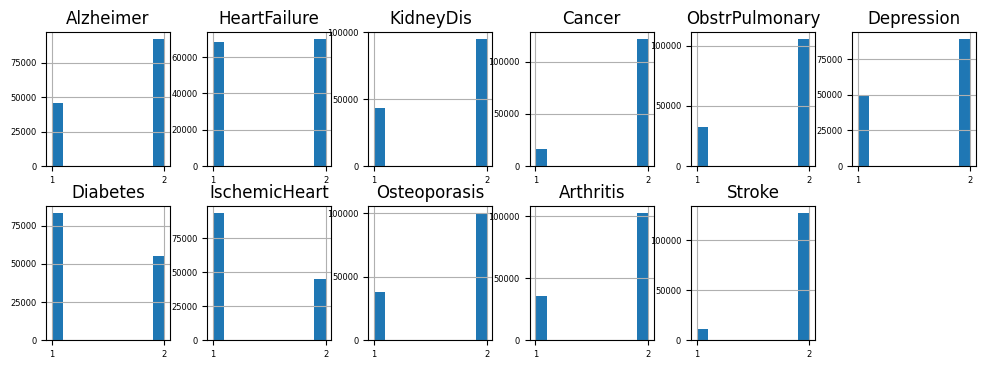

In [31]:
BeneData[ChronicConditions2].hist(figsize=(12,4), layout=(2,6),ylabelsize=6, xlabelsize=6)

In [32]:
inpatientData.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [33]:
inpatientData.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')>

array([[<Axes: title={'center': 'InscClaimAmtReimbursed'}>,
        <Axes: title={'center': 'DeductibleAmtPaid'}>,
        <Axes: title={'center': 'ClmProcedureCode_1'}>,
        <Axes: title={'center': 'ClmProcedureCode_2'}>],
       [<Axes: title={'center': 'ClmProcedureCode_3'}>,
        <Axes: title={'center': 'ClmProcedureCode_4'}>,
        <Axes: title={'center': 'ClmProcedureCode_5'}>,
        <Axes: title={'center': 'ClmProcedureCode_6'}>]], dtype=object)

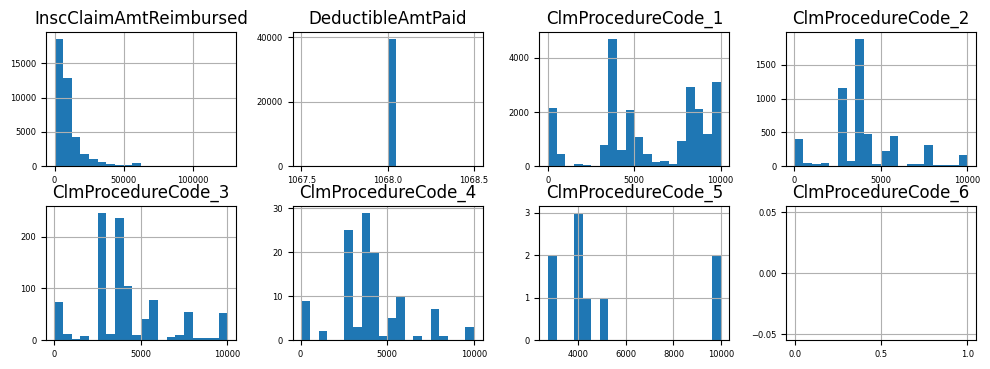

In [34]:
inpatientData.hist(figsize=(12,4),layout=(2,4),ylabelsize=6, xlabelsize=6,bins=20)

In [35]:
len(inpatientData.BeneID.unique())

31289

In [36]:
len(inpatientData.ClaimID.unique())

40474

In [37]:
len(inpatientData.Provider.unique())

2092

In [38]:
len(inpatientData.AttendingPhysician.unique())

11605

In [39]:
len(inpatientData.OperatingPhysician.unique())

8288

In [40]:
inpatientData.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [41]:
inpatientData.DeductibleAmtPaid.unique()

array([1068.,   nan])

In [42]:
inpatientData.ClmProcedureCode_6.unique()

array([nan])

In [43]:
outpatientData.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [44]:
# check that there is no overlap between inpatient and outpatient data
inpatientData.ClaimID[inpatientData.ClaimID.isin(outpatientData.ClaimID)]

Series([], Name: ClaimID, dtype: object)

In [45]:
outpatientData.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


array([[<Axes: title={'center': 'InscClaimAmtReimbursed'}>,
        <Axes: title={'center': 'ClmProcedureCode_1'}>,
        <Axes: title={'center': 'ClmProcedureCode_2'}>,
        <Axes: title={'center': 'ClmProcedureCode_3'}>],
       [<Axes: title={'center': 'ClmProcedureCode_4'}>,
        <Axes: title={'center': 'ClmProcedureCode_5'}>,
        <Axes: title={'center': 'ClmProcedureCode_6'}>,
        <Axes: title={'center': 'DeductibleAmtPaid'}>]], dtype=object)

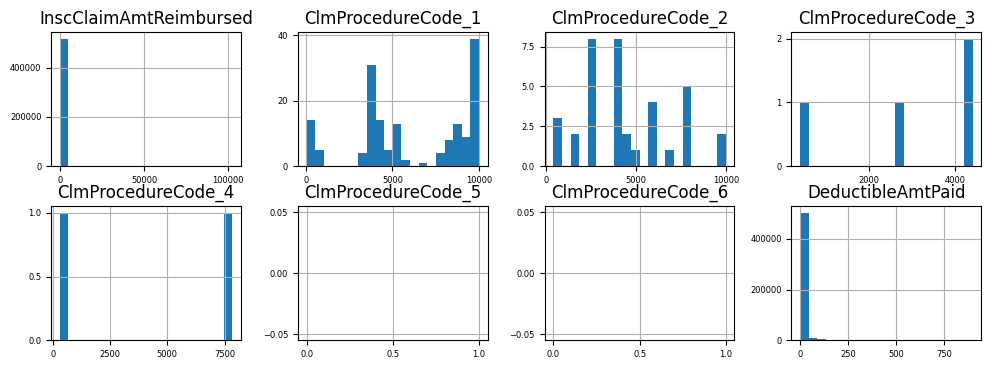

In [46]:
outpatientData.hist(figsize=(12,4),layout=(2,4),ylabelsize=6, xlabelsize=6,bins=20)

In [47]:
outpatientData.ClmProcedureCode_3.unique()

array([  nan,  412., 4401., 4299., 2724.])

In [48]:
outpatientData.ClmProcedureCode_4.unique()

array([  nan, 7840.,  311.])

In [49]:
outpatientData.DeductibleAmtPaid.unique()

array([  0, 200,  50,  70,  90, 100,  40,  30,  80,  20,  60,  10, 876,
       897, 886, 865])

In [50]:
fraudVals.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [51]:
fraudVals.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [52]:
fraudVals.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


# Start Coding Columns, Merging, and Cleaning Data

In [53]:
fraudVals['Fraud']= 0
fraudVals.Fraud[fraudVals.PotentialFraud=='Yes']=1

<ipython-input-53-3cab6ab30882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudVals.Fraud[fraudVals.PotentialFraud=='Yes']=1


In [54]:
# add column to label inpatient (1) or outpatent (0)
inpatientData['inpatient'] = 1
outpatientData['inpatient'] = 0

In [55]:
AllClaims = pd.concat([inpatientData, outpatientData], join='outer')
AllClaims.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,inpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [56]:
AllClaims.inpatient.unique()

array([1, 0])

In [57]:
AllClaimsLabeled = AllClaims.merge(fraudVals[['Provider','Fraud']], on='Provider')

In [58]:
AllClaimsLabeled[AllClaimsLabeled.Fraud==1]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,inpatient,Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1,1
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1,1
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1,1
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555683,BENE45812,CLM538417,2009-08-22,2009-08-22,PRV51103,10,NaN,NaN,NaN,NaN,20203,0.0,NaN,NaN,20275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
555684,BENE45812,CLM662711,2009-11-03,2009-11-03,PRV51103,80,PHY367643,NaN,NaN,NaN,25000,0.0,NaN,NaN,V6546,71590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
555685,BENE45812,CLM737090,2009-12-20,2009-12-20,PRV51103,200,PHY367643,NaN,PHY367643,NaN,NaN,0.0,NaN,NaN,72760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
555686,BENE58380,CLM359911,2009-05-15,2009-05-15,PRV51103,20,PHY319572,NaN,PHY319572,NaN,NaN,60.0,NaN,NaN,24980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [59]:
AllClaimsLabeled[AllClaimsLabeled.Fraud==0]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,inpatient,Fraud
107,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,0
108,BENE11183,CLM57950,2009-07-01,2009-07-03,PRV55907,26000,PHY369014,PHY391371,NaN,2009-07-01,78605,1068.0,2009-07-03,986,56089,0389,V433,82021,11284,E9478,4271,261,NaN,NaN,8345.0,NaN,NaN,NaN,NaN,NaN,1,0
109,BENE11352,CLM62859,2009-08-07,2009-08-12,PRV55907,4000,PHY328529,NaN,PHY391371,2009-08-07,7802,1068.0,2009-08-12,643,25080,2767,4019,40390,V4365,V1582,4439,53081,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
110,BENE11536,CLM62860,2009-08-07,2009-08-10,PRV55907,3000,PHY391371,NaN,NaN,2009-08-07,7802,1068.0,2009-08-10,620,27651,42789,72887,5859,2724,95919,7295,56039,5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
111,BENE18988,CLM80640,2009-12-24,2009-12-27,PRV55907,6000,PHY376827,NaN,NaN,2009-12-24,4280,1068.0,2009-12-27,256,4280,V4502,V1254,27801,2859,5939,2724,79902,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaN,99639,0.0,NaN,NaN,99661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558207,BENE157252,CLM603185,2009-09-28,2009-09-28,PRV57762,1900,PHY432730,NaN,NaN,NaN,1748,0.0,NaN,NaN,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5854,7907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaN,NaN,0.0,NaN,NaN,42789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [60]:
Allmerged = AllClaimsLabeled.merge(beneficiaryData, on='BeneID')

In [61]:
Allmerged.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,inpatient,Fraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,0,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1,1,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20
4,BENE17521,CLM119066,2009-01-04,2009-01-04,PRV55950,100,PHY311794,NaN,PHY394035,NaN,NaN,0.0,NaN,NaN,4919,1629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20


In [62]:
# add the number of physicians together, create new column 
Allmerged['physCount'] = np.sum([~Allmerged.AttendingPhysician.isna(), ~Allmerged.OperatingPhysician.isna(), ~Allmerged.OtherPhysician.isna()], axis=0)
Allmerged.physCount.head()

0    1
1    2
2    2
3    3
4    2
Name: physCount, dtype: int64

In [63]:
# count the number of Diagnosis codes and create in new columns
Allmerged['DiagCodeCount'] = np.sum([~Allmerged.ClmDiagnosisCode_1.isna(), ~Allmerged.ClmDiagnosisCode_2.isna(), 
                                     ~Allmerged.ClmDiagnosisCode_3.isna(), ~Allmerged.ClmDiagnosisCode_4.isna(),
                                     ~Allmerged.ClmDiagnosisCode_5.isna(), ~Allmerged.ClmDiagnosisCode_6.isna(),
                                     ~Allmerged.ClmDiagnosisCode_7.isna(), ~Allmerged.ClmDiagnosisCode_8.isna(),
                                     ~Allmerged.ClmDiagnosisCode_9.isna(), ~Allmerged.ClmDiagnosisCode_10.isna()],axis=0)
Allmerged.DiagCodeCount.head()

0    9
1    3
2    6
3    9
4    2
Name: DiagCodeCount, dtype: int64

In [64]:
# count the number of Procedure codes and create in new columns
Allmerged['ProcCodeCount'] = np.sum([~Allmerged.ClmProcedureCode_1.isna(), ~Allmerged.ClmProcedureCode_2.isna(), 
                                     ~Allmerged.ClmProcedureCode_3.isna(), ~Allmerged.ClmProcedureCode_4.isna(),
                                     ~Allmerged.ClmProcedureCode_5.isna(), ~Allmerged.ClmProcedureCode_6.isna()],axis=0)
Allmerged.ProcCodeCount.head()

0    0
1    1
2    0
3    2
4    0
Name: ProcCodeCount, dtype: int64

In [65]:
# Code claim duration to a new column
Allmerged['claim_time'] = (pd.to_datetime(Allmerged.ClaimEndDt) - pd.to_datetime(Allmerged.ClaimStartDt)).dt.days
Allmerged.claim_time.head()

0     6
1     2
2     3
3    12
4     0
Name: claim_time, dtype: int64

In [66]:
#sum the number of chronic conditions
Allmerged['Chronic_count'] = np.sum([Allmerged.RenalDiseaseIndicator==1, Allmerged.ChronicCond_Alzheimer==1, 
                                        Allmerged.ChronicCond_Heartfailure==1, Allmerged.ChronicCond_KidneyDisease==1, 
                                        Allmerged.ChronicCond_Cancer==1, Allmerged.ChronicCond_ObstrPulmonary==1,
                                        Allmerged.ChronicCond_Depression==1, Allmerged.ChronicCond_Diabetes==1,
                                        Allmerged.ChronicCond_IschemicHeart==1, Allmerged.ChronicCond_Osteoporasis==1,
                                        Allmerged.ChronicCond_rheumatoidarthritis==1, Allmerged.ChronicCond_stroke==1], axis=0)

In [ ]:
# maybe don't do this? But you can make a csv if you must.
#Allmerged.to_csv(r'\drive\MyDrive\HealthCareFraudData_merged.csv')

array([[<Axes: title={'center': 'physCount'}>,
        <Axes: title={'center': 'DiagCodeCount'}>,
        <Axes: title={'center': 'ProcCodeCount'}>,
        <Axes: title={'center': 'claim_time'}>,
        <Axes: title={'center': 'Chronic_count'}>]], dtype=object)

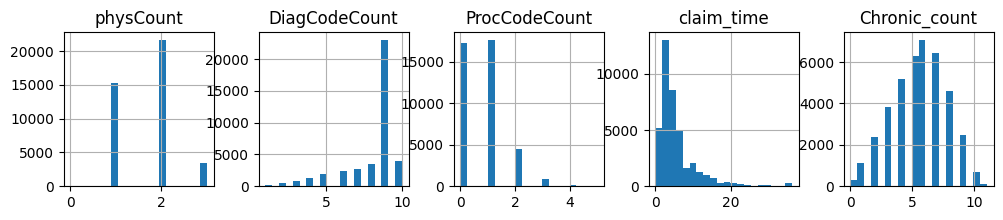

In [67]:
newCols = ['physCount','DiagCodeCount','ProcCodeCount','claim_time','Chronic_count']
Allmerged[Allmerged.inpatient==1][newCols].hist(figsize=(12,2),layout=(1,5), bins=20)
#plt.legend(['Poss Fraud','Not Fraud'])

array([[<Axes: title={'center': 'physCount'}>,
        <Axes: title={'center': 'DiagCodeCount'}>,
        <Axes: title={'center': 'ProcCodeCount'}>,
        <Axes: title={'center': 'claim_time'}>,
        <Axes: title={'center': 'Chronic_count'}>]], dtype=object)

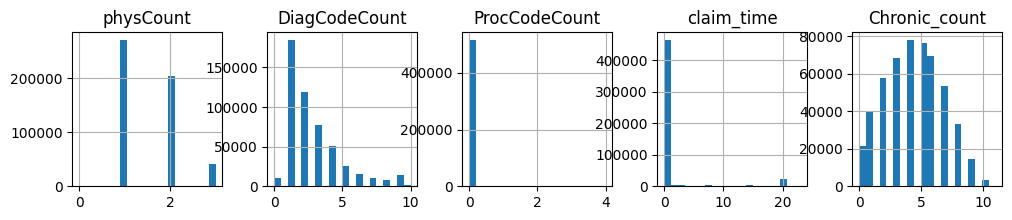

In [68]:
newCols = ['physCount','DiagCodeCount','ProcCodeCount','claim_time','Chronic_count']
Allmerged[Allmerged.inpatient==0][newCols].hist(figsize=(12,2),layout=(1,5), bins=20)

Post Cleaned Data Imported Here

In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/ENPM808Y-Professionals/scaled_sampled_1.csv')
df.head()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,claim_time,type,Gender,Race,State,County,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,living,phy_status,Renal_Indicator,chronic_count,Fraud
0,0,-0.130056,-0.285942,0.000730,0.000074,0.000625,1.0,0.0,1.0,0.0,0.0,0.410410,-0.272179,0.423385,1.139092,2.046168,0.0,3.0,0.0,3.0,0
1,1,9.159414,3.614518,0.000236,0.000041,0.007278,4.0,1.0,1.0,0.0,0.0,0.510511,2.610838,0.423385,0.319893,-0.508671,0.0,3.0,0.0,5.0,0
2,2,2.879209,3.614518,0.000089,0.001790,0.000362,2.0,1.0,1.0,0.0,0.0,0.160160,7.616665,1.329105,-0.002119,0.249797,0.0,3.0,0.0,10.0,0
3,3,-0.242576,-0.285942,0.000783,0.010226,0.009483,0.0,0.0,1.0,0.0,0.0,0.510511,-0.019342,0.423385,-0.491577,-0.578530,0.0,3.0,0.0,7.0,0
4,4,0.524132,3.614518,0.000712,0.002416,0.000053,5.0,1.0,0.0,0.0,0.0,0.510511,-0.189031,0.423385,-0.586893,-0.648389,0.0,3.0,0.0,5.0,0


In [10]:
df = df.drop(columns="Unnamed: 0")

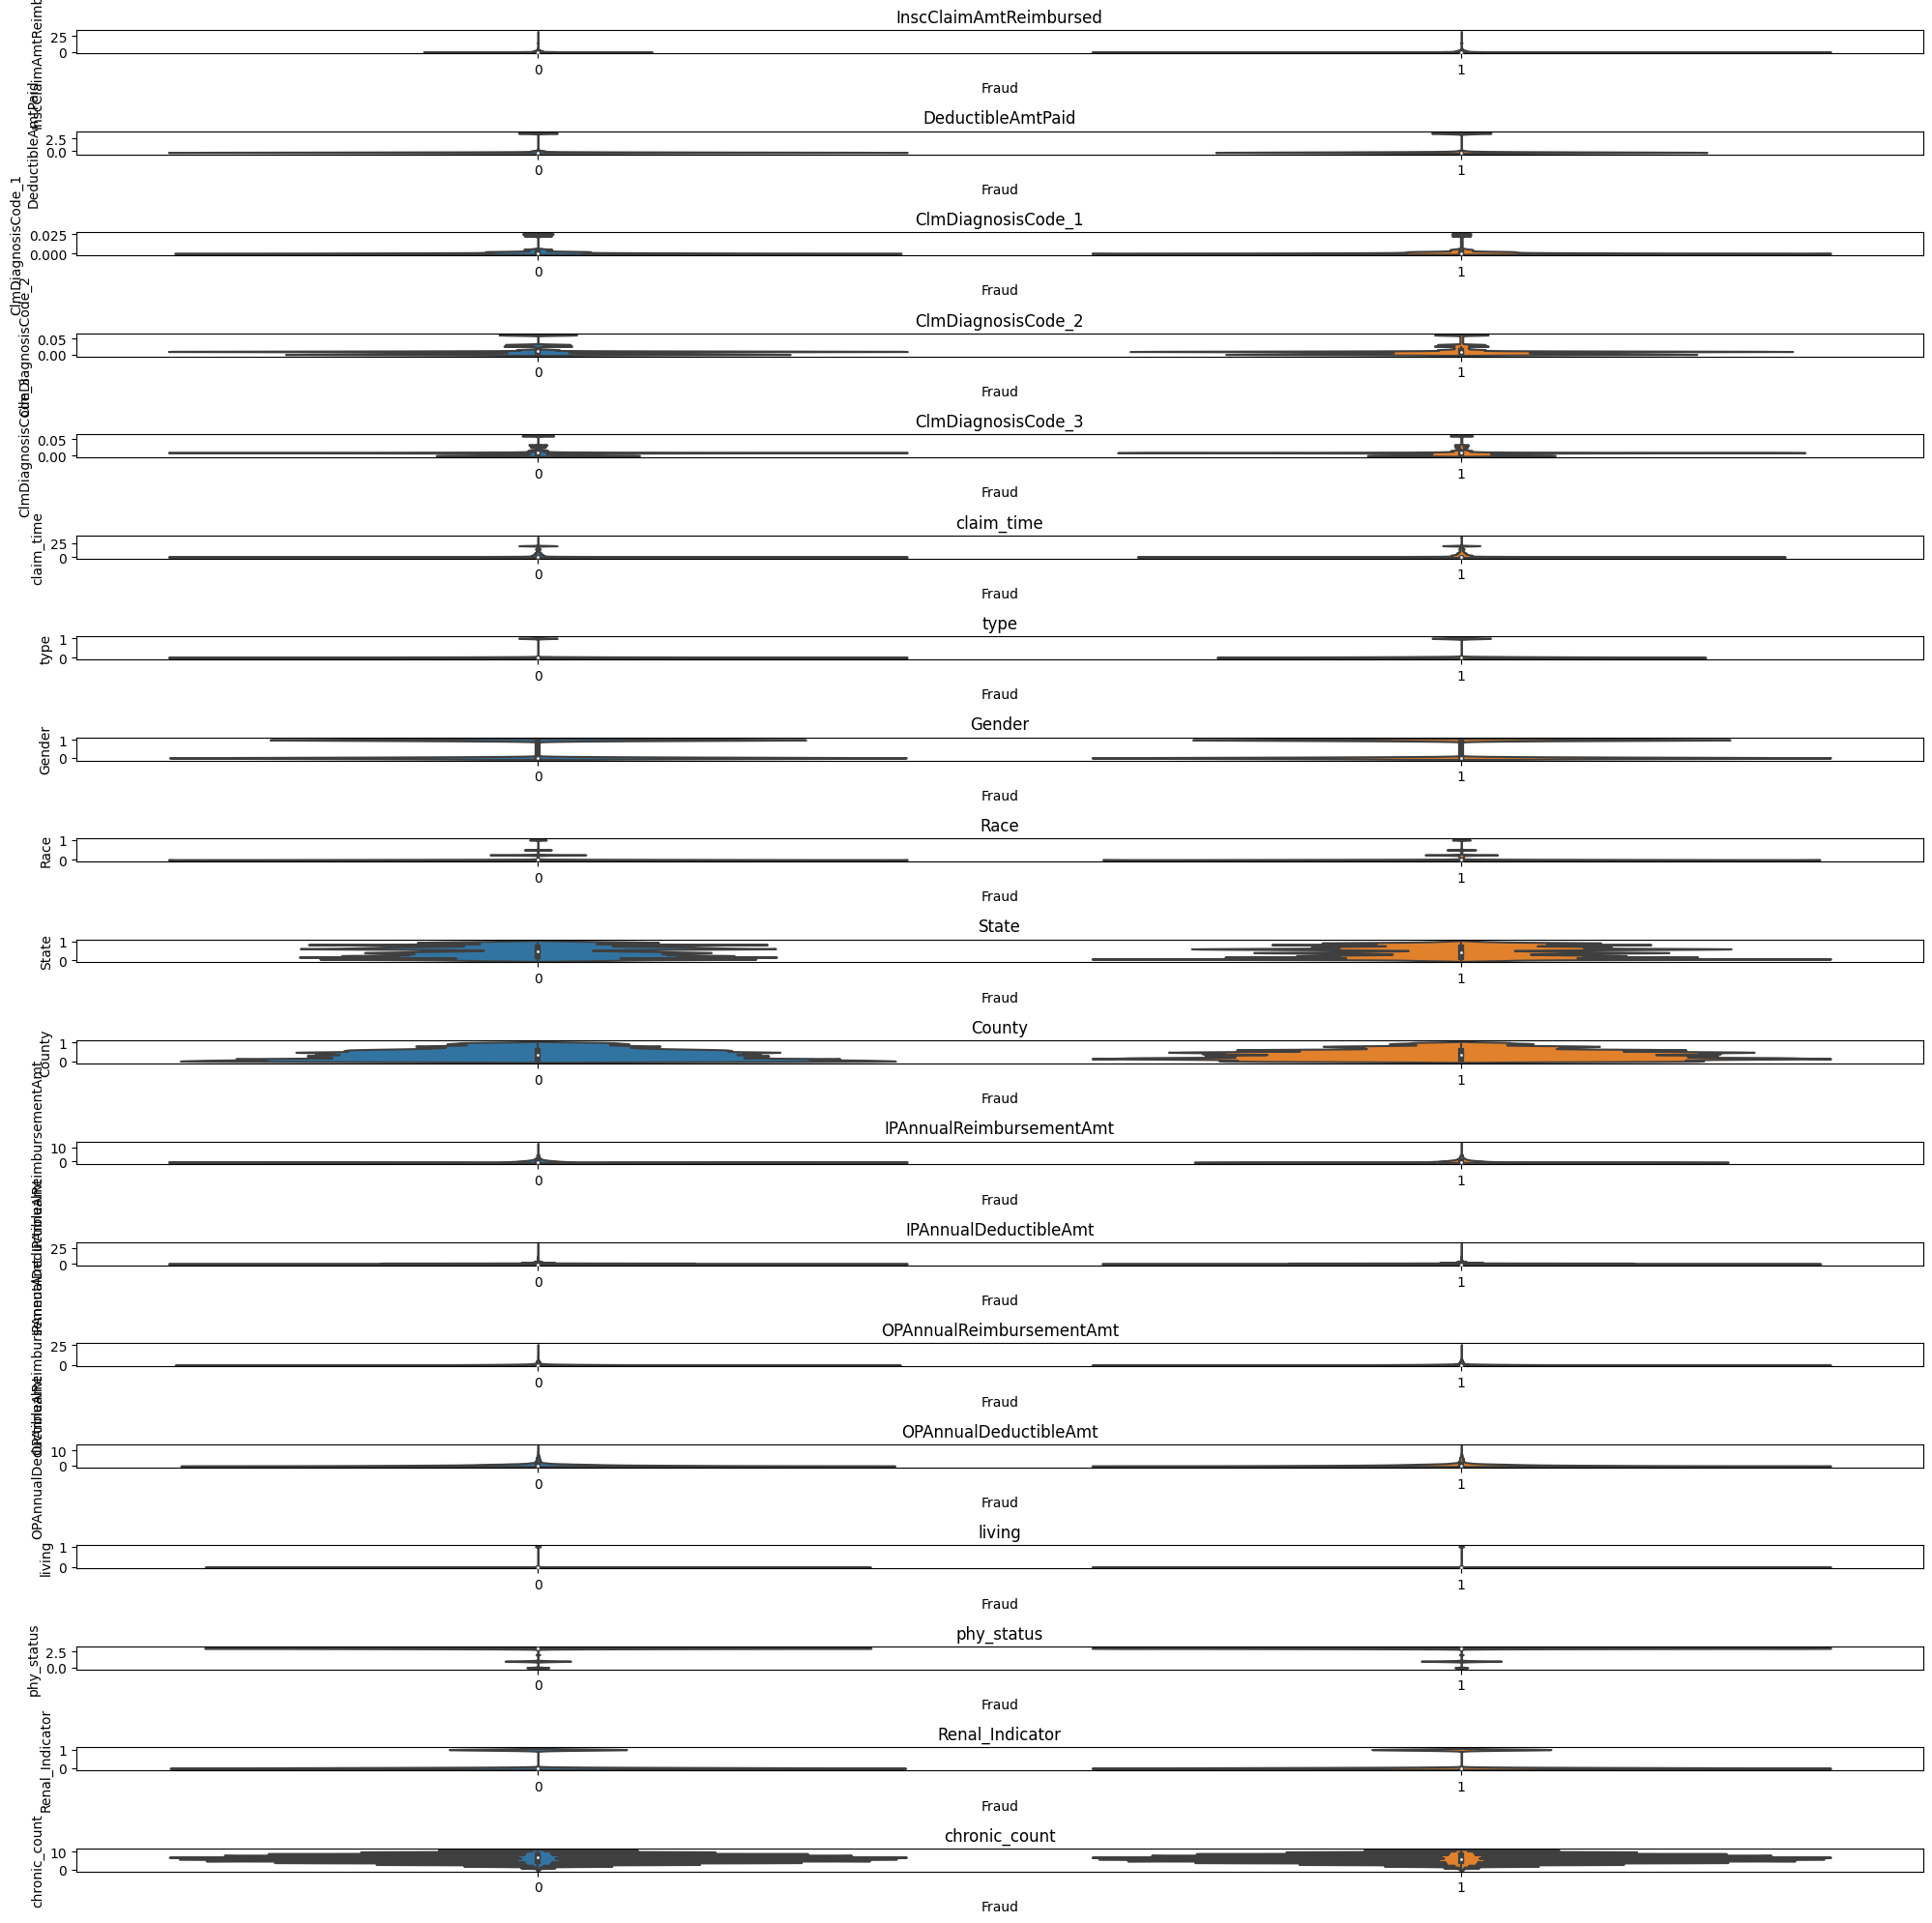

In [102]:
fig, axes = plt.subplots(19, 1, figsize=(20, 20))
for i, col in enumerate(df.drop(columns='Fraud').columns):
    plt.subplot(19,1,i+1)
    sns.violinplot(data=df, x=df['Fraud'], y=col)
    axes[i].set_title(col)
plt.tight_layout()

<Axes: >

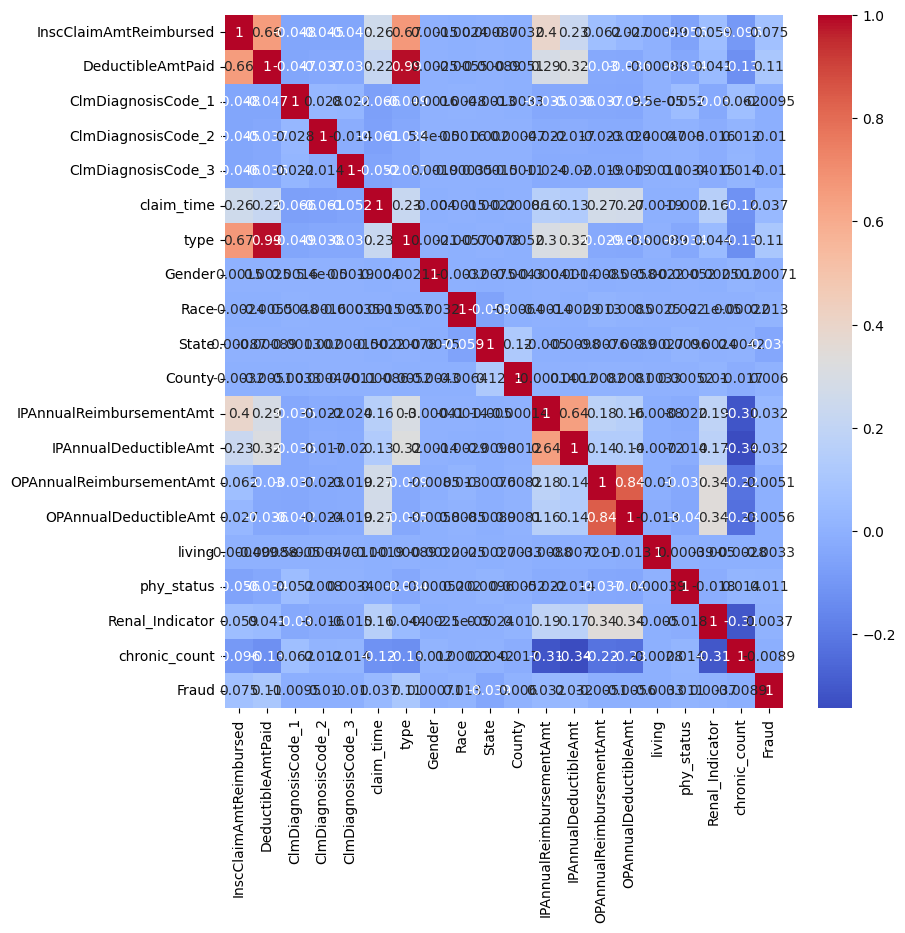

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #, linewidths=0.5, fmt='.2f')

In [ ]:
#sns.pairplot(df,diag_kind='kde',kind='scatter')
#plt.show()